# Problem Statement

To build a predecive model and find out the sales of each product at a particular store.

# Work Flow

1. Data Collection -> Loading the dataset
2. Preprocessing -> missing values, categories to numbers, bringing variables in range 0 to 1
3. Creating training and test set
4. Defining the architecture of the model -> building a neural network using Keras
5. Compiling the model -> (defining loss/cost function, optimizer)
6. Training the model
7. Evaluating model performance -> on both training and test set
8. Visualizing the model performance

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import InputLayer, Dense
import matplotlib.pyplot as plt
%matplotlib inline

# Data Collection

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Big_Mart_Sales.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# shape of the data
data.shape

(8523, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# checking for missing vaues in the dataset
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Preprocessing

**1. Filing the missing values**

In [6]:
# Replacing the missing values of Item_Weight with mean of the values
data.Item_Weight.fillna(data.Item_Weight.mean(), inplace=True)

In [7]:
# Replacing the missing values of Outlet_Size with mode of the values
mode_Outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [8]:
Outlet_size_missing_vales = data.Outlet_Size.isnull()

data.loc[Outlet_size_missing_vales, 'Outlet_Size'] = data.loc[Outlet_size_missing_vales, 'Outlet_Type'].apply(lambda x: mode_Outlet_size[x])

In [9]:
# checking missing values after imputation
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**2. Converting categories to numbers**

In [11]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
data[categorical_features].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [13]:
for feature in categorical_features:
    print(feature,':',len(data[feature].unique()))

Item_Identifier : 1559
Item_Fat_Content : 5
Item_Type : 16
Outlet_Identifier : 10
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4


In [14]:
# converting the categories into numbers by data encoding
from sklearn.preprocessing import LabelEncoder

# label encoding
encoder = LabelEncoder()
data.Item_Identifier = encoder.fit_transform(data.Item_Identifier)

In [15]:
# Item fat content
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
data.replace({'Item_Fat_Content':{'Low Fat':'low fat','LF':'low fat','reg':'Regular'}}, inplace=True)
data.Item_Fat_Content.value_counts()

low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [17]:
data.Item_Fat_Content = encoder.fit_transform(data.Item_Fat_Content)
data.Item_Type = encoder.fit_transform(data.Item_Type)
data.Outlet_Identifier = encoder.fit_transform(data.Outlet_Identifier)
data.Outlet_Size = encoder.fit_transform(data.Outlet_Size)
data.Outlet_Location_Type = encoder.fit_transform(data.Outlet_Location_Type)
data.Outlet_Type = encoder.fit_transform(data.Outlet_Type)

In [18]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,0,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,0,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**3. Bringing all the variables in range 0 to 1**

In [19]:
data['Item_Identifier']=(data['Item_Identifier']-data['Item_Identifier'].min())/(data['Item_Identifier'].max()-data['Item_Identifier'].min())

In [20]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [21]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,1.0,0.048866,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,0.0,0.058705,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,1.0,0.051037,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,0.0,0.000000,0.400000,0.640093,0.000000,0.541667,1.0,1.0,0.000000,0.053555
4,0.832478,0.260494,1.0,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651


# Creating training and test set

In [22]:
# separating the independent and dependent variables

# storing all the independent variables as X
x = data.iloc[:,:-1]

# storing the dependent variable as y
y = data.Item_Outlet_Sales

In [23]:
# Splitting into training data & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [24]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Defining the architecture of the model

In [25]:
# number of features in the data
x_train.shape

(6818, 11)

In [26]:
# number of features in the data
x_train.shape[1]

11

In [27]:
# defining input neurons
input_neurons = x_train.shape[1]

number of output neurons -> since Big mart sales prediction is a regression problem, we will have single neuron in the output layer

In [28]:
# define number of output neurons
output_neurons = 1

number of hidden layers and hidden neurons -> It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [29]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

activation function of different layers -> picked relu as an activation function for hidden layers. since it is a regression problem, linear activation function is used in the final layer

In [30]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

In [31]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


# Compiling the model (defining loss/cost function, optimizer)

In [32]:
# Evaluation metric as mse
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mse'])

# Training the model

passing the independent and dependent features for training set for training the model -> test data will be evaluated at the end of each epoch -> setting the epochs as 50

In [33]:
# storing the trained model in model_history variable which will be used to visualize the training process
model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
214/214 [==============================] - 4s 5ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2/50
214/214 [==============================] - 1s 4ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 3/50
214/214 [==============================] - 1s 4ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 4/50
214/214 [==============================] - 1s 4ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 5/50
214/214 [==============================] - 1s 3ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 6/50
214/214 [==============================] - 1s 3ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 7/50
214/214 [==============================] - 1s 3ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 8/50
214/214 [==============================] - 1s 3ms/step - loss: 0.

# Evaluating model performance on test set

In [34]:
# getting predictions for the test set
prediction = model.predict_generator(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [35]:
# calculating the accuracy on test set
import sklearn
sklearn.metrics.r2_score(y_test, prediction)

0.567901427989937

# Visualizing the model performance

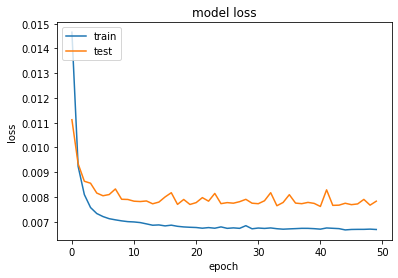

In [36]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

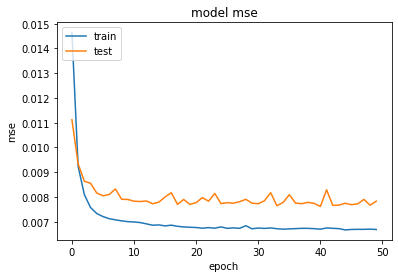

In [37]:
# summarize history for mse
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()